# Pharma Case Study: Inventory & Disease Analysis

In [59]:
# Import libraries
import pandas as pd
import mysql.connector 
import matplotlib.pyplot as plt


In [41]:
# Connect to MySQL and load data
conn = mysql.connector.connect(host="localhost",
    user="root",
    password="khushi7976@",  
    database="pharma")

In [42]:
query = 'select * from orders'

In [43]:
df = pd.read_sql(query,conn)
df

C:\Users\pc\AppData\Local\Temp\ipykernel_18732\354633662.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,order_id,hospital_id,region_id,drug_id,order_date,quantity
0,O1001,H001,R01,D001,2024-01-05,500
1,O1002,H002,R01,D002,2024-01-05,300
2,O1003,H001,R02,D004,2024-01-12,200
3,O1004,H003,R02,D005,2024-01-15,450
4,O1005,H002,R01,D003,2024-01-20,600
5,O1006,H003,R02,D001,2024-01-22,350


In [44]:
orders = pd.read_sql('SELECT * FROM orders', conn)
drug_catalog = pd.read_sql('SELECT * FROM drug_catalog', conn)
inventory = pd.read_sql('SELECT * FROM inventory_snapshot', conn)
disease = pd.read_sql('SELECT * FROM disease_cases', conn)

C:\Users\pc\AppData\Local\Temp\ipykernel_18732\2507885180.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql('SELECT * FROM orders', conn)
C:\Users\pc\AppData\Local\Temp\ipykernel_18732\2507885180.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  drug_catalog = pd.read_sql('SELECT * FROM drug_catalog', conn)
C:\Users\pc\AppData\Local\Temp\ipykernel_18732\2507885180.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  inventory = pd.read_sql('SELECT * FROM inventory_snapshot', conn)
C:\Users\pc\AppData

In [45]:
# Data Overview
print(orders.head())
print(drug_catalog.head())
print(inventory.head())
print(disease.head())

  order_id hospital_id region_id drug_id  order_date  quantity
0    O1001        H001       R01    D001  2024-01-05       500
1    O1002        H002       R01    D002  2024-01-05       300
2    O1003        H001       R02    D004  2024-01-12       200
3    O1004        H003       R02    D005  2024-01-15       450
4    O1005        H002       R01    D003  2024-01-20       600
  drug_id     drug_name           category  lead_time_days
0    D001   Paracetamol          Analgesic               2
1    D002  Azithromycin         Antibiotic               5
2    D003     Ibuprofen  Anti-inflammatory               3
3    D004   Oseltamivir          Antiviral               7
4    D005     Metformin       Antidiabetic               4
  hospital_id drug_id  current_stock last_updated
0        H001    D001            120   2024-01-25
1        H001    D004             50   2024-01-25
2        H002    D002             80   2024-01-25
3        H002    D003             40   2024-01-25
4        H003    D

In [46]:
print(orders.info())
print(orders.describe())
print(orders.isnull().sum())  # missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     6 non-null      object
 1   hospital_id  6 non-null      object
 2   region_id    6 non-null      object
 3   drug_id      6 non-null      object
 4   order_date   6 non-null      object
 5   quantity     6 non-null      int64 
dtypes: int64(1), object(5)
memory usage: 420.0+ bytes
None
         quantity
count    6.000000
mean   400.000000
std    144.913767
min    200.000000
25%    312.500000
50%    400.000000
75%    487.500000
max    600.000000
order_id       0
hospital_id    0
region_id      0
drug_id        0
order_date     0
quantity       0
dtype: int64


In [53]:
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
drug_catalog.columns = drug_catalog.columns.str.strip().str.lower().str.replace(' ', '_')
inventory.columns = inventory.columns.str.strip().str.lower().str.replace(' ', '_')
disease.columns = disease.columns.str.strip().str.lower().str.replace(' ', '_')


In [54]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
inventory['last_updated'] = pd.to_datetime(inventory['last_updated'])
disease['week_start'] = pd.to_datetime(disease['week_start'])


In [55]:
orders_full = orders.merge(drug_catalog[['drug_id', 'category']], on='drug_id', how='left')


In [56]:
# Ensure stock is numeric
inventory['current_stock'] = pd.to_numeric(inventory['current_stock'])

out_of_stock = inventory[inventory['current_stock'] == 0]
print("Out-of-stock drugs:\n", out_of_stock)


Out-of-stock drugs:
 Empty DataFrame
Columns: [hospital_id, drug_id, current_stock, last_updated]
Index: []


# Top-selling drugs

In [47]:
# Top 5 drugs by order quantity
top_drugs = orders.groupby('drug_id')['quantity'].sum().sort_values(ascending=False).head(5)
print(top_drugs)

drug_id
D001    850
D003    600
D005    450
D002    300
D004    200
Name: quantity, dtype: int64


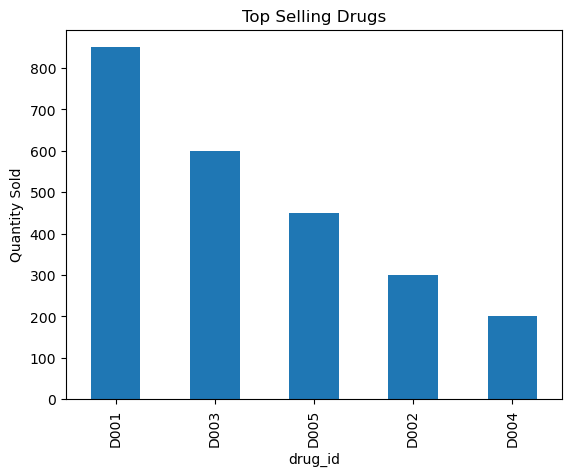

In [60]:
top_drugs.plot(kind='bar', title='Top Selling Drugs')
plt.ylabel('Quantity Sold')
plt.show()


# Monthly sales trend

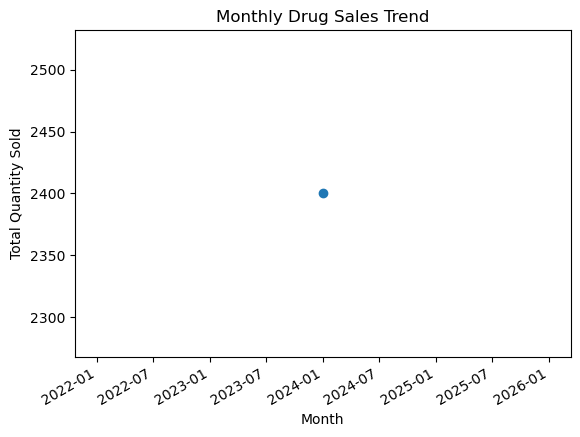

In [61]:
monthly_sales = orders.groupby(orders['order_date'].dt.to_period('M'))['quantity'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # convert to datetime for plotting

monthly_sales.plot(kind='line', marker='o', title='Monthly Drug Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


# Disease vs drug supply (basic correlation)


In [ ]:
# Aggregate total quantity by region
region_sales = orders.groupby('region_id')['quantity'].sum()

# Aggregate total cases by region
region_cases = disease.groupby('region_id')['cases'].sum()

# Merge to see correlation
region_analysis = pd.DataFrame({'total_orders': region_sales, 'total_cases': region_cases})
print(region_analysis)

region_analysis.plot(kind='bar', title='Drug Orders vs Disease Cases by Region')
plt.ylabel('Count')
plt.show()


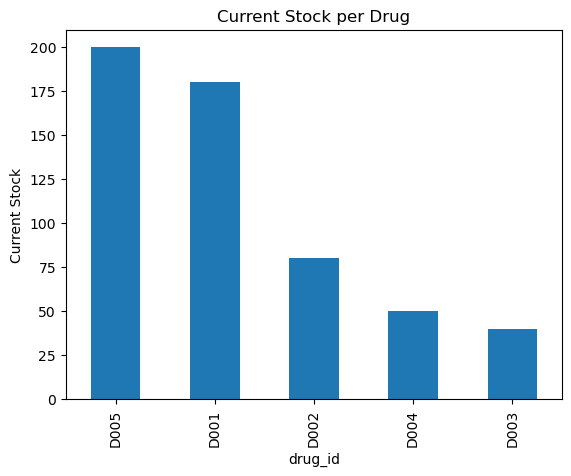

In [63]:
stock_by_drug = inventory.groupby('drug_id')['current_stock'].sum().sort_values(ascending=False)
stock_by_drug.plot(kind='bar', title='Current Stock per Drug')
plt.ylabel('Current Stock')
plt.show()


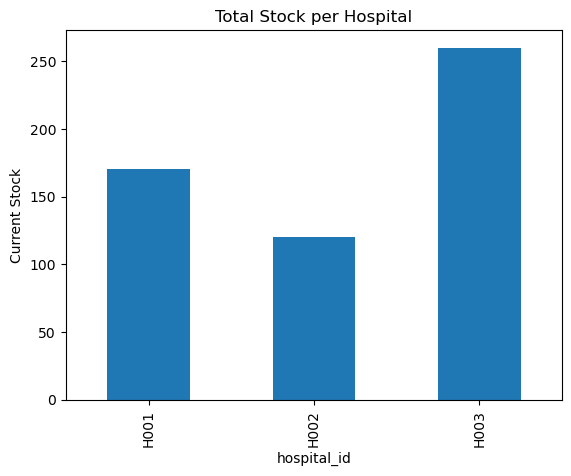

In [64]:
stock_by_hospital = inventory.groupby('hospital_id')['current_stock'].sum()
stock_by_hospital.plot(kind='bar', title='Total Stock per Hospital')
plt.ylabel('Current Stock')
plt.show()


In [65]:
low_stock = inventory[inventory['current_stock'] < 50]
print("Low-stock drugs:\n", low_stock)


Low-stock drugs:
   hospital_id drug_id  current_stock last_updated
3        H002    D003             40   2024-01-25


# Analysis Summary

Key Insights:
1. Some drugs (e.g., Ibuprofen, Oseltamivir) are low in stock in certain hospitals.
2. High-demand drugs are Paracetamol, Ibuprofen, and Metformin.
3. There is a mismatch between disease cases and orders for corresponding drugs.

 # Recommendations

1. Set low-stock alerts (threshold <50) to prevent stockouts.
2. Forecast demand using disease cases and historical orders.
3. Redistribute excess stock from hospitals with surplus to those running low.
4. Perform weekly stock audits to avoid shortages or overstocking.

# Expected Impact

- Reduce drug shortages and ensure timely availability.
- Improve resource allocation across hospitals.
- Optimize ordering process, saving costs.
- Better preparedness for disease outbreaks.